## A Comparative analysis of user experience for O2 and BT telecommunications  

## Introduction
This data contains `A Comparative analysis of user experience for O2 and BT` telecommunications using sentiment analysis on social media data. 

In recent years, the importance of user experience in the telecommunications industry has increased significantly. Telecommunications companies are now more focused on providing better services to their customers, as user satisfaction is a key factor in customer retention and acquisition. In this study, we will conduct a comparative analysis of user experience for O2 and BT telecommunications using sentiment analysis on social media data. The study will use sentiment analysis to determine the overall sentiment of social media posts related to the two companies and will also use an organizational scheme to present the findings, point-by-point. 


In [1]:
#import all packages and set plots to be embedded inline
import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import nltk

from langdetect import detect_langs
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
import warnings
warnings.filterwarnings("ignore", message="Glyph 12288")

In [3]:
# Load in the dataset into a pandas dataframe
df_o2= pd.read_csv('BT_tweets_2013_2023.csv')
df_bt= pd.read_csv('O2_tweets_2013_2023.csv')

In [4]:
df_o2.sample(10)

,Date,ID,Content,URL,Username,Location,Followers,Following,Verified,Source,Likes,Retweets,Replies
6842,2016-12-30 22:18:38+00:00,814958903888842753,Oh dearpoor youI dont like the cold now,https://twitter.com/lyndaward5/status/81495890...,lyndaward5,oxfordshire,2512,1322,False,Twitter for iPad,1,0,1
8410,2017-12-30 23:07:33+00:00,947242784989294594,SI ESTE ES NUEVO X QUE PARA SER TT TIENE QUE S...,https://twitter.com/lucia7_bt/status/947242784...,lucia7_bt,Argentina,280,356,False,Twitter Web App,2,5,0
17007,2021-12-30 22:03:03+00:00,1476675224280387584,NaN,https://twitter.com/bt_tnm_tr/status/147667522...,bt_tnm_tr,取引垢,492,538,False,Twitter for iPhone,0,0,1
5826,2015-12-30 20:46:08+00:00,682301667472224257,we off to watch box set Aquarius pals Nite xx,https://twitter.com/Cal_BT/status/682301667472...,Cal_BT,#KnapperIsland,1706,833,False,Twitter for iPhone,1,0,2
17606,2021-12-30 21:01:10+00:00,1476659649537798145,NaN,https://twitter.com/maro0_916/status/147665964...,maro0_916,\(° ∀ 。)／,248,551,False,Twitter for Android,0,0,1
20156,2023-04-09 21:14:18+00:00,1645173313772326914,NaN,https://twitter.com/hana_BT1/status/1645173313...,hana_BT1,Unknown,3078,322,False,Twitter for iPhone,0,0,0
21560,2023-04-09 20:13:40+00:00,1645158055234109440,If not no worries I can buy more from those we...,https://twitter.com/mysterH33/status/164515805...,mysterH33,Lumeria,182,1250,False,Twitter Web App,1,0,0
4281,2015-12-30 23:32:45+00:00,682343595223875585,I Love U TO Victoria,https://twitter.com/vousmevoyez_bt/status/6823...,vousmevoyez_bt,Unknown,53,34,False,twittbot.net,0,0,0
3847,2014-12-30 21:19:41+00:00,550038539316895744,126 5\n10bcbt5,https://twitter.com/yaricon/status/55003853931...,yaricon,Unknown,18,25,False,jigtwi,0,0,0
6785,2016-12-30 22:27:56+00:00,814961242716704768,Follow the protocol Phonecall asking why no I...,https://twitter.com/EwanWhyte/status/814961242...,EwanWhyte,Unknown,153,201,False,Twitter for Android,0,0,0


In [5]:
df_bt.sample(10)

,Date,ID,Content,URL,Username,Location,Followers,Following,Verified,Source,Likes,Retweets,Replies
11592,2018-12-30 12:52:05+00:00,1079359467538575360,So annoyed got back from Sri Lanka and checked...,https://twitter.com/LeezumLepcha/status/107935...,LeezumLepcha,"Newcastle Upon Tyne, England",25,43,False,Twitter for iPhone,2,0,1
17990,2021-12-30 15:58:14+00:00,1476583415310868483,Bien y me alegro mucho de que ests bien,https://twitter.com/carnal_pulp_o2/status/1476...,carnal_pulp_o2,buscando a Nemo,542,1004,False,Twitter for Android,1,0,1
20820,2023-04-09 19:10:31+00:00,1645142164211417089,O2 and Nitrogen go The robots think Im overly ...,https://twitter.com/abellware/status/164514216...,abellware,"Jersey City, NJ",231,58,False,Moa Bridge,0,0,0
21713,2023-04-09 16:49:10+00:00,1645106589513154560,Lorna Luft also covered a bit of Elton John wh...,https://twitter.com/SquidyUK/status/1645106589...,SquidyUK,"London, England",3600,3076,False,Twitter for Android,0,0,1
9382,2017-12-30 14:21:32+00:00,947110407474311168,NaN,https://twitter.com/LAI_O2/status/947110407474...,LAI_O2,Unknown,0,0,False,Twitter for iPhone,2,0,0
9132,2017-12-30 15:20:16+00:00,947125187878666241,NaN,https://twitter.com/91_myeon_/status/947125187...,91_myeon_,Unknown,33,35,False,Twitter for Android,0,0,1
5843,2015-12-30 15:15:41+00:00,682218504200695808,NaN,https://twitter.com/tepodon070/status/68221850...,tepodon070,東京都,162,223,False,Twitter for iPhone,0,0,0
9701,2017-12-30 13:08:08+00:00,947091936619347969,NaN,https://twitter.com/nennemi_o2/status/94709193...,nennemi_o2,Unknown,650,474,False,Twitter for iPhone,0,0,0
19514,2022-12-30 17:11:20+00:00,1608873381990109184,0x8d5e9eA833B4599c9f4253758634798579309cE3,https://twitter.com/takeoff_o2/status/16088733...,takeoff_o2,"Web2, touching grass",1032,2309,False,Twitter for Android,1,0,0
9087,2017-12-30 15:30:49+00:00,947127843556802561,NaN,https://twitter.com/mikazuki_O2/status/9471278...,mikazuki_O2,ロックハンド,89,177,False,Twitter for Android,1,0,1


In [6]:
#column names and datatype
print(df_o2.info())
print(df_bt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       22000 non-null  object
 1   ID         22000 non-null  int64 
 2   Content    16206 non-null  object
 3   URL        22000 non-null  object
 4   Username   22000 non-null  object
 5   Location   22000 non-null  object
 6   Followers  22000 non-null  int64 
 7   Following  22000 non-null  int64 
 8   Verified   22000 non-null  bool  
 9   Source     22000 non-null  object
 10  Likes      22000 non-null  int64 
 11  Retweets   22000 non-null  int64 
 12  Replies    22000 non-null  int64 
dtypes: bool(1), int64(6), object(6)
memory usage: 2.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       22000 non-null  object
 1   ID         

In [7]:
#statistical description of the dataset
print(df_o2.describe())
print(df_bt.describe())

                 ID     Followers      Following         Likes      Retweets  \
count  2.200000e+04  2.200000e+04   22000.000000  22000.000000  22000.000000   
mean   1.070799e+18  9.062734e+03    1128.781273      2.395864      0.413364   
std    4.054566e+17  1.248908e+05    7268.874582     76.028016      7.385623   
min    4.177818e+17  0.000000e+00       0.000000      0.000000      0.000000   
25%    6.823389e+17  9.800000e+01      97.000000      0.000000      0.000000   
50%    1.079487e+18  3.750000e+02     373.000000      0.000000      0.000000   
75%    1.476663e+18  1.506000e+03    1034.000000      1.000000      0.000000   
max    1.645175e+18  8.004763e+06  907010.000000  10243.000000    565.000000   

            Replies  
count  22000.000000  
mean       0.372091  
std        1.234680  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max       64.000000  
                 ID     Followers      Following       Likes      Retweets  \
cou

In [8]:
#number of unique values in each column
print(df_o2.nunique())
print(df_bt.nunique())

Date         19973
ID           22000
Content      14685
URL          22000
Username     11392
Location      5345
Followers     3434
Following     2935
Verified         2
Source         412
Likes          129
Retweets        72
Replies         28
dtype: int64
Date         20996
ID           22000
Content      11333
URL          22000
Username      9716
Location      4367
Followers     3169
Following     2655
Verified         2
Source         367
Likes          113
Retweets        62
Replies         34
dtype: int64


## Data Wrangling

Data Wrangling, also known as Data Cleaning or Data Preprocessing, is the process of cleaning, transforming, and preparing raw data for analysis. The goal of data wrangling is to make the data usable and relevant for analysis by removing inconsistencies, errors, and redundancies that may be present in the data. This process often involves removing missing data, dealing with outliers, merging or splitting datasets, and transforming data into a standardized format.

Data wrangling is a crucial step in data analysis as it ensures that the data is accurate, consistent, and suitable for the intended analysis. Data that has not been properly wrangled can lead to incorrect or unreliable results. Therefore, data wrangling is an essential skill for any data scientist or analyst who works with large or complex datasets.

In [11]:
#dropping column o2
df_o2.drop(['ID','URL',], axis=1, inplace= True)

In [12]:
#dropping column bt
df_bt.drop(['ID','URL',], axis=1, inplace= True)

In [13]:
df_o2.columns = map(str.lower, df_o2.columns)

In [14]:
df_o2.sample()

,date,content,username,location,followers,following,verified,source,likes,retweets,replies
1955,2013-12-30 22:21:07+00:00,nao consigo olhar pra minha header e lembrar d...,barbarafelixb,Unknown,3899,153,False,Twitter Web Client,0,0,0


In [15]:
df_bt.columns = map(str.lower, df_bt.columns)

In [16]:
df_bt.sample()

,date,content,username,location,followers,following,verified,source,likes,retweets,replies
19841,2022-12-30 16:18:32+00:00,How do you even get a sleep study done My over...,AmandaB55744931,"London, England",669,138,False,Twitter for iPhone,1,0,1


In [17]:
#fill in missing location with 'None'
df_o2['content'].fillna('None', inplace=True)

#change the datatype of tweet_time to datetime 
df_o2['date'] = df_o2['date'].astype('datetime64')

In [18]:
df_o2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       22000 non-null  datetime64[ns]
 1   content    22000 non-null  object        
 2   username   22000 non-null  object        
 3   location   22000 non-null  object        
 4   followers  22000 non-null  int64         
 5   following  22000 non-null  int64         
 6   verified   22000 non-null  bool          
 7   source     22000 non-null  object        
 8   likes      22000 non-null  int64         
 9   retweets   22000 non-null  int64         
 10  replies    22000 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(5), object(4)
memory usage: 1.7+ MB


In [19]:
#fill in missing location with 'None'
df_bt['content'].fillna('None', inplace=True)

#change the datatype of tweet_time to datetime 
df_bt['date'] = df_bt['date'].astype('datetime64')

In [20]:
df_bt['content'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 22000 entries, 0 to 21999
Series name: content
Non-Null Count  Dtype 
--------------  ----- 
22000 non-null  object
dtypes: object(1)
memory usage: 172.0+ KB


In [21]:
df_o2[df_o2['content']== 'None']

,date,content,username,location,followers,following,verified,source,likes,retweets,replies
2,2013-12-30 23:59:55,None,Hye____b_17,Re :,5,4,False,Twitter for iPhone,0,0,0
8,2013-12-30 23:59:44,None,Abdulrab_Bt,المملكة العربية السعودية,201,1060,False,GharedlyCom,0,0,0
18,2013-12-30 23:59:24,None,akatuki_bt,Unknown,681,851,False,Janetter,0,0,0
21,2013-12-30 23:59:14,None,draculia_bot,平安京,168,88,False,吸血姫ＢＯＴ,0,0,0
25,2013-12-30 23:59:04,None,kan_taku,"富山県, Japan",1058,1071,False,twicca,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
21987,2023-04-09 19:54:28,None,vyhAPIraF80BtBS,لبنان انا لبناني اب عن جد,1186,4013,False,Twitter for Android,1,0,0
21991,2023-04-09 19:54:21,None,bt11oooo,Unknown,1024,529,False,Twitter for iPhone,0,0,0
21994,2023-04-09 19:54:11,None,3OvTKGj0hMLwQBt,إيطاليا . فلورنس 🇮🇹 🇹🇳💕,1178,992,False,Twitter for Android,0,0,0
21996,2023-04-09 19:54:09,None,BTNews242,Unknown,9,48,False,Twitter for Android,0,0,0


In [22]:
def get_languages(content):
    '''This function detects the language in each 
    tweet and returns it in ISO 639-1 codes'''
    try:
        content = detect_langs(content)
    except: 
        content = "nolang"
    content = str(content).split(':')[0][1:]
    return content

In [23]:
#applying the get_languages function on df_o2
df_o2['language'] = df_o2['content'].apply(get_languages)

In [25]:
#applying the get_languages function on df_bt
df_bt['language'] = df_bt['content'].apply(get_languages)

In [26]:
#substituting the short form language names for the long names on df_o2
lang_code = pd.read_csv('language_codes.csv')
dict_lang_code = dict(zip(lang_code['alpha2'], lang_code['English']))
df_o2['language'] = df_o2['language'].replace(dict_lang_code)

In [27]:
#substituting the short form language names for the long names on df_bt
df_bt['language'] = df_bt['language'].replace(dict_lang_code)

In [28]:
#checking for changes df_02
df_o2.language.value_counts()[:10]

English       9225
Norwegian     5784
German         888
Indonesian     710
Portuguese     640
Spanish        586
olang          443
French         434
Somali         386
Swahili        363
Name: language, dtype: int64

In [29]:
#checking for changes df_bt
df_bt.language.value_counts()[:10]

Norwegian     8712
English       7692
Portuguese     922
olang          694
German         489
Turkish        438
Spanish        352
Italian        319
French         299
Polish         278
Name: language, dtype: int64

In [30]:
def get_links(df_o2):
    '''This function iterate over the tweets and return 
    'Yes' is there's a link and 'No' if there's no link '''
    link = re.findall(r'((http|ftp|https):\/\/)(([\w.-]*)\.([\w]*))', df_o2)
    if len(link) < 1:
        return 'No'
    else: return 'Yes'

In [31]:
#applying the get_links function df_o2
df_o2['contains_media'] = df_o2['content'].apply(get_links)

In [32]:
#applying the get_links function df_bt
df_bt['contains_media'] = df_bt['content'].apply(get_links)

In [33]:
#checking for changes df_o2
df_o2.contains_media.value_counts()

No    22000
Name: contains_media, dtype: int64

In [34]:
#checking for changes df_bt
df_bt.contains_media.value_counts()

No    22000
Name: contains_media, dtype: int64

In [35]:
#get the sentiment scores using Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()
df_o2['sentiment_scores'] = df_o2['content'].apply(sia.polarity_scores)
df_o2['sentiment_scores'] = df_o2['sentiment_scores'].apply(lambda x: x['compound'])

In [36]:
#get the sentiment scores using Sentiment Intensity Analyzer
df_bt['sentiment_scores'] = df_bt['content'].apply(sia.polarity_scores)
df_bt['sentiment_scores'] = df_bt['sentiment_scores'].apply(lambda x: x['compound'])

In [37]:
def get_sentiment(content):
    '''This functions returns Positive, Negative or 
    Neutral depending on the state of the sentiment score'''
    if content > 0:
        return "Positive"
    elif content == 0:
        return "Neutral"
    else: return "Negative"

In [38]:
#applying the get_sentiment function on df_o2
df_o2['sentiment'] = df_o2['sentiment_scores'].apply(get_sentiment)

In [39]:
#applying the get_sentiment function df_bt
df_bt['sentiment'] = df_bt['sentiment_scores'].apply(get_sentiment)

In [40]:
#checking for changes df_o2
df_o2['sentiment'].value_counts()

Neutral     13639
Positive     5193
Negative     3168
Name: sentiment, dtype: int64

In [41]:
#checking for changes df_bt
df_bt['sentiment'].value_counts()

Neutral     15734
Positive     4069
Negative     2197
Name: sentiment, dtype: int64

In [42]:
def get_country(inc_c, case, cor_c):
    '''This function substitutes the current location for the country name'''
    df_o2.loc[df_o2['c_location'].str.contains(inc_c, case=case), 'c_location'] = cor_c

In [43]:
#duplicate the location column to another column 
df_o2['c_location'] = df_o2['location']

#substitute incorrect spelling for correct spelling
dicts = {'brazil':'Brazil', 'brasil':'Brazil', 'nigeria':'Nigeria', 'méxico': 'Mexico', 'france':'France', 
        'india':'India', 'london':'United Kingdom', 'UK':'United Kingdom', 'england':'United Kingdom',
        'Bonaire':'Bonaire Islands', 'España':'Spain', 'thailand':'Thailand', 'Ohio':'United States',
        'South Africa':'South Africa'}
for key, val in dicts.items():
    get_country(key, False, val)

#substitute state names in the US
list_us = ['USA', 'KS', 'FL', 'CA', 'GA', 'AZ', 'CO','IL', 'TX', 'PA', 'DC', 'TN', 'NY', 'WA', 'NYC', 'NC', 'NV', 'OH', 'LA', 'MA', 'Los Angeles' 'new york','New York', 'Los Angeles']
for states in list_us:
    get_country(states, True, 'United States')

#minor formatting
df_o2['c_location'].replace(['None', 'she/her'], np.nan, inplace=True)
df_o2['c_location'].value_counts()[:10]

Unknown           7629
United Kingdom    1127
United States     1057
India              334
Nigeria            275
골목길의 어딘가           165
Cambs              155
Brazil             151
South Africa       150
France             108
Name: c_location, dtype: int64

In [44]:
def get_country(inc_c, case, cor_c):
    '''This function substitutes the current location for the country name'''
    df_bt.loc[df_bt['c_location'].str.contains(inc_c, case=case), 'c_location'] = cor_c

In [45]:
#duplicate the location column to another column 
df_bt['c_location'] = df_bt['location']

#substitute incorrect spelling for correct spelling
dicts = {'brazil':'Brazil', 'brasil':'Brazil', 'nigeria':'Nigeria', 'méxico': 'Mexico', 'france':'France', 
        'india':'India', 'london':'United Kingdom', 'UK':'United Kingdom', 'england':'United Kingdom',
        'Bonaire':'Bonaire Islands', 'España':'Spain', 'thailand':'Thailand', 'Ohio':'United States',
        'South Africa':'South Africa'}
for key, val in dicts.items():
    get_country(key, False, val)

#substitute state names in the US
list_us = ['USA', 'KS', 'FL', 'CA', 'GA', 'AZ', 'CO','IL', 'TX', 'PA', 'DC', 'TN', 'NY', 'WA', 'NYC', 'NC', 'NV', 'OH', 'LA', 'MA', 'Los Angeles' 'new york','New York', 'Los Angeles']
for states in list_us:
    get_country(states, True, 'United States')

#minor formatting
df_bt['c_location'].replace(['None', 'she/her'], np.nan, inplace=True)
df_bt['c_location'].value_counts()[:10]

Unknown                         7997
United Kingdom                  2526
United States                    594
قلبك.                            329
Dublin, Ireland (June 1969)      223
استغفر الله                      207
矛盾都市                             136
So this is how liberty dies.     126
 #meganebiiki                    125
France                           107
Name: c_location, dtype: int64

In [46]:
#frequency of df_o2_source
df_o2['source'].value_counts()[:10]

Twitter for Android        7059
Twitter for iPhone         6234
twittbot.net               2786
Twitter Web App            1306
Twitter Web Client          918
Twitter for iPad            522
Twitter for BlackBerry®     345
Mobile Web (M2)             242
IFTTT                       193
TweetDeck                   186
Name: source, dtype: int64

In [47]:
#frequency of df_bt_source
df_bt['source'].value_counts()[:10]

Twitter for iPhone          9683
Twitter for Android         5191
Twitter Web App              943
Twitter Web Client           896
Qualtrics Social Connect     736
twittbot.net                 620
Twitter for iPad             351
IFTTT                        309
Instagram                    206
Facebook                     177
Name: source, dtype: int64

In [48]:
#frequency of verified or not df_o2
df_o2['verified'].value_counts()

False    21681
True       319
Name: verified, dtype: int64

In [49]:
#frequency of verified or not df_bt
df_bt['verified'].value_counts()

False    20858
True      1142
Name: verified, dtype: int64

In [50]:
#final sampling of the dataset df_02
df_o2.sample(20)

,date,content,username,location,followers,following,verified,source,likes,retweets,replies,language,contains_media,sentiment_scores,sentiment,c_location
3663,2014-12-30 21:37:22,Bama my team so they gone win regardless oh,BT_2Real,Unknown,1856,995,False,Twitter for iPhone,0,0,2,English,No,0.6204,Positive,Unknown
8244,2017-12-30 23:25:07,SE UNIERON MUCHOS VAOS,lucia7_bt,Argentina,280,356,False,Twitter Web App,0,2,0,German,No,0.0000,Neutral,Argentina
3721,2014-12-30 21:31:19,None,Misaka20001_one,Unknown,2,1,False,Biyon≡( ε:),0,0,1,Norwegian,No,0.0000,Neutral,Unknown
19134,2022-12-30 21:32:46,None,Ghala_Bt,In my own world,146,288,False,Twitter for iPhone,0,0,0,Norwegian,No,0.0000,Neutral,In my own world
15235,2020-12-30 21:24:37,Right next door boys The family never walks th...,DirtyHippyDalek,"Opium Den, Skaro",2928,2378,False,Twitter Web App,3,0,3,English,No,0.2153,Positive,"Opium Den, Skaro"
10219,2018-12-30 23:25:37,None,AS_Raina_bt,play Girlz,56,15,False,twittbot.net,0,0,0,Norwegian,No,0.0000,Neutral,play Girlz
6656,2016-12-30 22:42:38,Elite forces pushed in2 Mosul from the east in...,ShanVanAug,"Bandung, Indonesia",182,136,False,Twitter Web Client,0,0,1,English,No,0.4215,Positive,"Bandung, Indonesia"
13008,2019-12-30 21:39:14,None,222pipeyna,Unknown,2067,2193,False,Twitter for Android,6,0,0,Norwegian,No,0.0000,Neutral,Unknown
3833,2014-12-30 21:20:45,BT Estimado cliente debe comunicarse con su pr...,LibertyHelpVE,Venezuela,71445,17410,False,Hootsuite,0,0,3,Spanish,No,0.0000,Neutral,Venezuela
8378,2017-12-30 23:11:20,None,wkbys_BT,ビジネスドジっ子,81,90,False,Twitter for Android,0,0,0,Norwegian,No,0.0000,Neutral,ビジネスドジっ子


In [68]:
#final sampling of the dataset df_bt
df_bt.sample(20)

,date,content,username,location,followers,following,verified,source,likes,retweets,replies,language,contains_media,sentiment_scores,sentiment,c_location
9819,2017-12-30 12:37:37,None,nennemi_o2,Unknown,650,474,False,Twitter for iPhone,4,0,0,Norwegian,No,0.0000,Neutral,NaN
9913,2017-12-30 12:13:34,Hi there been contracted for over 10 years and...,ThomasHall44,London,17,71,False,Twitter for Android,0,0,0,English,No,-0.0498,Negative,United Kingdom
16623,2021-12-30 21:11:48,O,hknx01,Unknown,634,816,False,Twitter for iPhone,1,0,0,Portuguese,No,0.0000,Neutral,NaN
21306,2023-04-09 17:46:53,Eski arsenal geri dnsn istiyorum O2 formal ruh...,Yilmazjanvesely,"Gaziantep, Türkiye",36,47,False,Twitter for Android,0,0,0,Turkish,No,0.0000,Neutral,NaN
18197,2022-12-30 23:01:52,NBA Card 1230 \n\nAll 1U Plays\n\nBol Bol o235...,MillyProps,The Lab 🧪🥼,4163,543,False,Twitter for iPhone,34,2,0,English,No,0.3818,Positive,NaN
20266,2023-04-09 21:12:02,None,MELA_O2,قلبك.,17423,1964,False,Twitter for iPhone,1,0,0,Norwegian,No,0.0000,Neutral,NaN
19099,2022-12-30 18:28:25,None,abod_o2,استغفر الله,26359,1491,False,Twitter for iPhone,0,0,0,Norwegian,No,0.0000,Neutral,NaN
1323,2013-12-30 19:24:33,Were sorry to hear this Have we advised that t...,O2,UK,372141,52348,True,Twitter,0,0,3,English,No,-0.5423,Negative,United Kingdom
19297,2022-12-30 17:57:30,Thanks for being no help at all,Matmo80Matt,flimby by the sea,132,382,False,Twitter for iPhone,0,0,0,English,No,0.5267,Positive,NaN
16277,2021-12-30 22:39:47,Right numbers wrong order Prince sold out 21 ...,debswild,London,3730,1267,False,Twitter for iPhone,0,0,0,English,No,-0.4767,Negative,United Kingdom


## Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a process of examining and analyzing data sets to summarize their main characteristics, often with visual methods. The purpose of EDA is to understand the underlying patterns, relationships, and distributions of the data, and to identify any outliers or missing values that may affect the results of further analysis. EDA can also be used to generate hypotheses and ideas for further investigation. It typically involves plotting the data in various ways, calculating summary statistics, and identifying any anomalies or patterns. EDA is often the first step in any data analysis project and can help determine which statistical techniques or models are appropriate for the data.

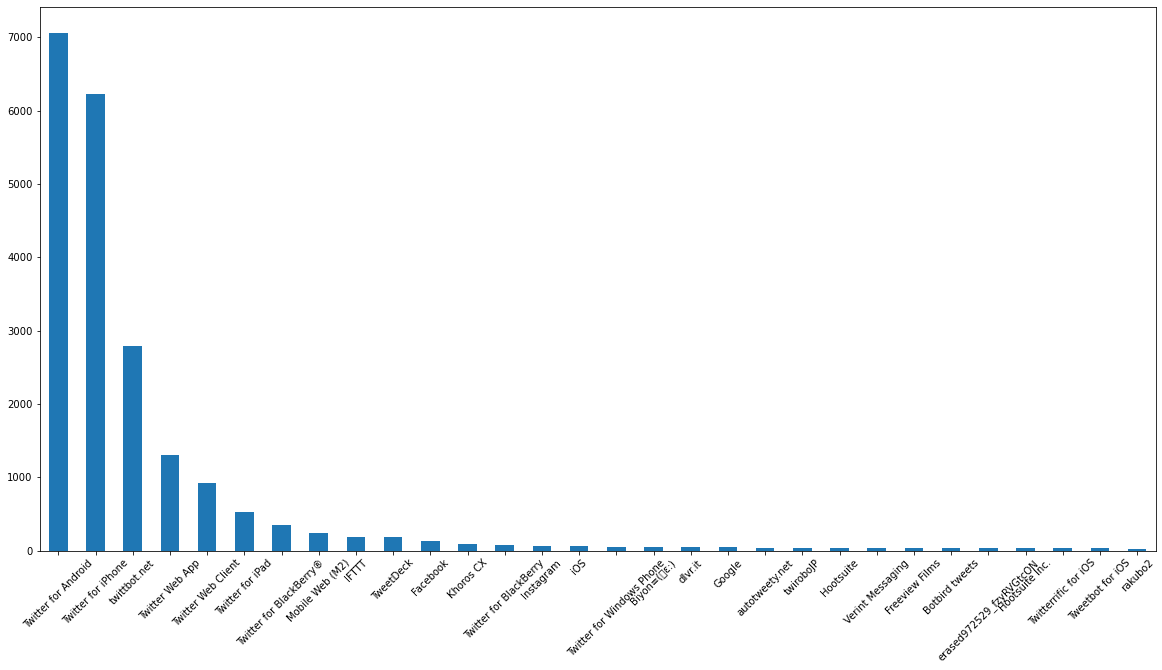

In [52]:
# Plot the source value_counts o2
plt.figure(figsize=(20,10))
df_o2['source'].value_counts().nlargest(30).plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

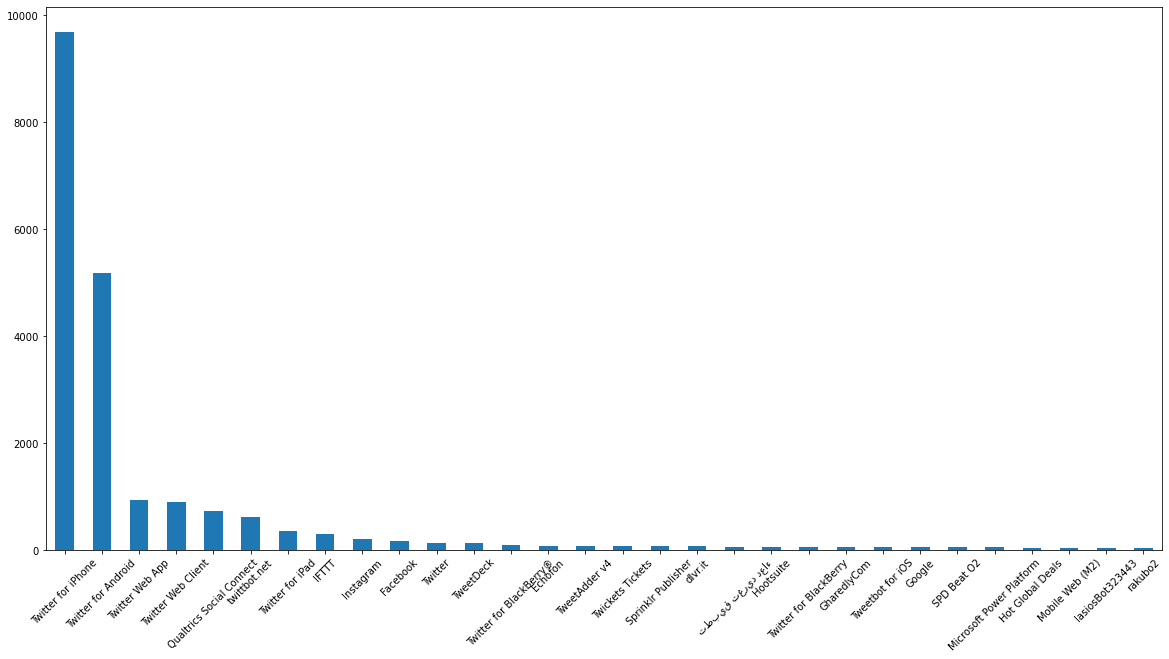

In [53]:
# Plot the source value_counts bt
plt.figure(figsize=(20,10))
df_bt['source'].value_counts().nlargest(30).plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

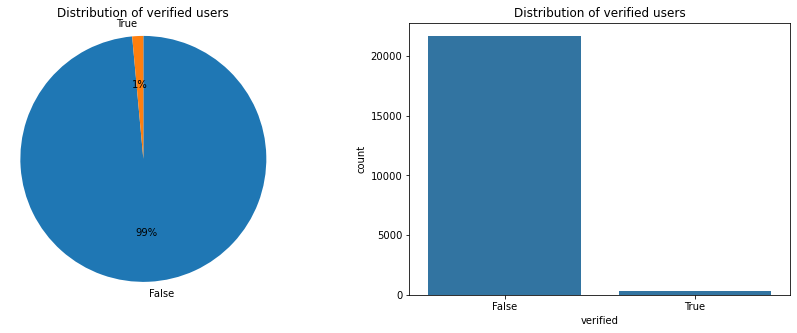

In [54]:
# A sublot of pie chart and bar chart verified user
def pie_bar_plot():
   plt.figure(figsize=[15,5]);

   # Pie chart on the left
   plt.subplot(1,2,1);
   sorted_user = df_o2.verified.value_counts();
   plt.pie(sorted_user, labels=sorted_user.index, startangle=90,autopct='%1.0f%%', counterclock=False);
   plt.axis("square");
   plt.title("Distribution of verified users");

   # Barplot on the right
   plt.subplot(1,2,2);
   base_color = sns.color_palette()[0]
   sns.countplot(data=df_o2, x="verified", color=base_color);
   plt.title("Distribution of verified users");

pie_bar_plot()

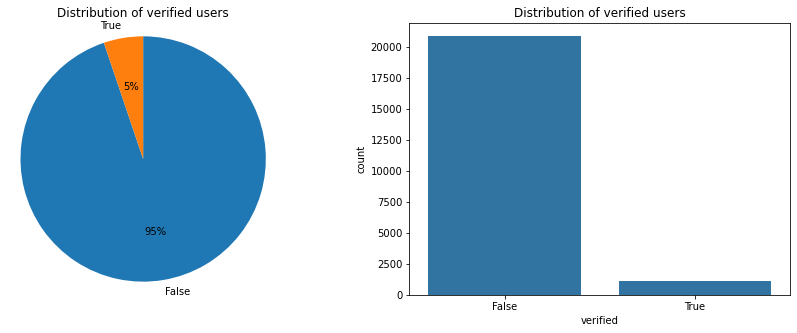

In [55]:
# A sublot of pie chart and bar chart of verified users
def pie_bar_plot():
   plt.figure(figsize=[15,5]);

   # Pie chart on the left
   plt.subplot(1,2,1);
   sorted_user = df_bt.verified.value_counts();
   plt.pie(sorted_user, labels=sorted_user.index, startangle=90,autopct='%1.0f%%', counterclock=False);
   plt.axis("square");
   plt.title("Distribution of verified users");

   # Barplot on the right
   plt.subplot(1,2,2);
   base_color = sns.color_palette()[0]
   sns.countplot(data=df_bt, x="verified", color=base_color);
   plt.title("Distribution of verified users");

pie_bar_plot()

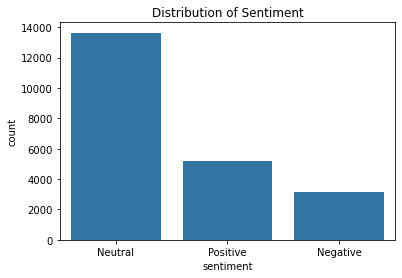

In [56]:
# Distribution of sentiment frequency 
ax = sns.countplot(data=df_o2, x="sentiment", color=sns.color_palette()[0])
total=len(df_o2)
for a in ax.patches:
    percentage = "{:2f}%".format(100 * a.get_height()/total)
    x = a.get_height()+ a.get_width()/2
    y = a.get_height()+0.8
    ax.annotate(percentage, (x, y), ha="center")
    plt.title("Distribution of Sentiment");    

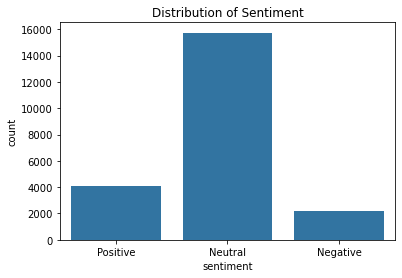

In [57]:
# Distribution of sentiment frequency 
ax = sns.countplot(data=df_bt, x="sentiment", color=sns.color_palette()[0])
total=len(df_bt)
for a in ax.patches:
    percentage = "{:2f}%".format(100 * a.get_height()/total)
    x = a.get_height()+ a.get_width()/2
    y = a.get_height()+0.8
    ax.annotate(percentage, (x, y), ha="center")
    plt.title("Distribution of Sentiment");    

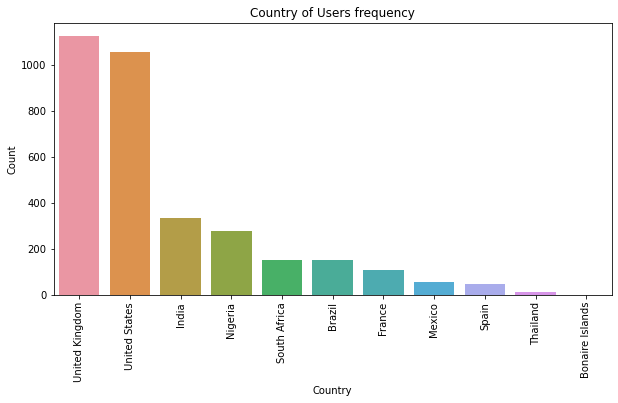

In [58]:
# Bar chart showing the users Country
location= ['United Kingdom','United States','India','Nigeria','South Africa','Brazil','France','Mexico','Spain','Thailand','Bonaire Islands']
location = pd.api.types.CategoricalDtype(ordered=True, categories=location)
df_o2['c_location'] = df_o2['c_location'].astype(location)


plt.figure(figsize=[10, 5])
sns.countplot(data=df_o2, x='c_location');
plt.xlabel('Country');
plt.ylabel('Count');
plt.xticks(rotation=90);
plt.title("Country of Users frequency");

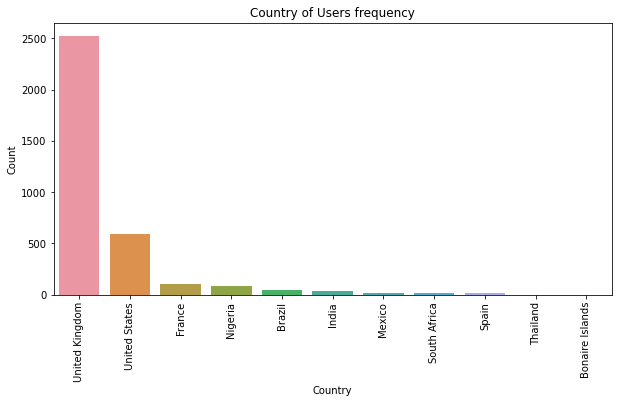

In [59]:
# Bar chart showing the Country of users
location= ['United Kingdom','United States','France','Nigeria','Brazil','India','Mexico','South Africa','Spain','Thailand','Bonaire Islands']
location = pd.api.types.CategoricalDtype(ordered=True, categories=location)
df_bt['c_location'] = df_bt['c_location'].astype(location)

#df_o2_sorted = df_o2.sort_values(by='c_location', ascending=True)

plt.figure(figsize=[10, 5])
sns.countplot(data=df_bt, x='c_location');
plt.xlabel('Country');
plt.ylabel('Count');
plt.xticks(rotation=90);
plt.title("Country of Users frequency");

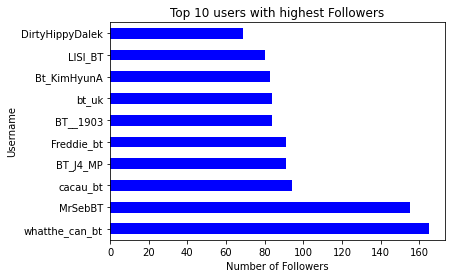

In [60]:
df_o2.groupby('username').agg('count')['followers'].sort_values(ascending=False).head(10).plot(kind= 'barh', color= 'blue')
plt.xlabel('Number of Followers')
plt.ylabel('Username')
plt.title('Top 10 users with highest Followers');

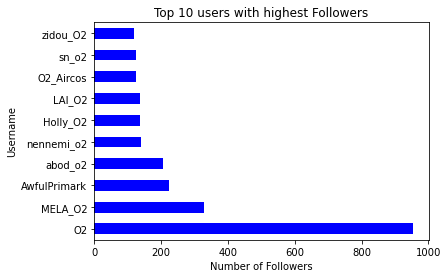

In [61]:
df_bt.groupby('username').agg('count')['followers'].sort_values(ascending=False).head(10).plot(kind= 'barh', color= 'blue')
plt.xlabel('Number of Followers')
plt.ylabel('Username')
plt.title('Top 10 users with highest Followers');

(-0.5, 399.5, 199.5, -0.5)

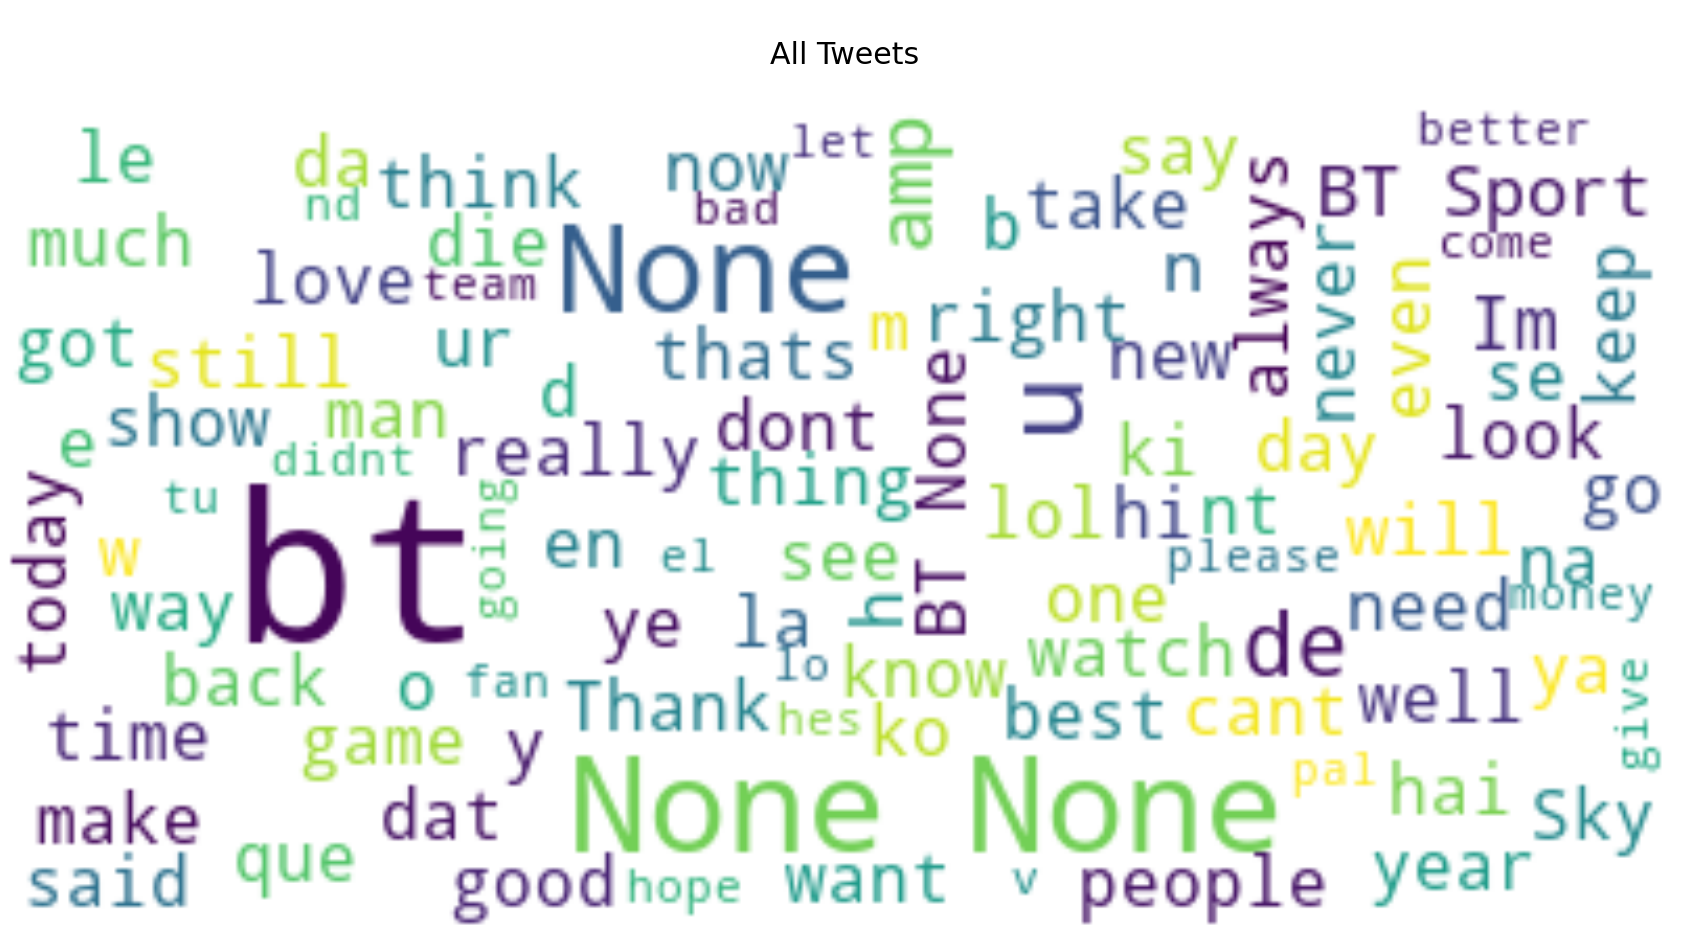

In [62]:
### Word Cloud
from wordcloud import WordCloud
# Visualization through wordclouds
tweet_All = " ".join(review for review in df_o2.content)

fig, ax = plt.subplots(1, 1, figsize  = (30,30))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)

# Display the generated image:
ax.imshow(wordcloud_ALL, interpolation='bilinear')
ax.set_title('\nAll Tweets\n', fontsize=30)
ax.axis('off')

(-0.5, 399.5, 199.5, -0.5)

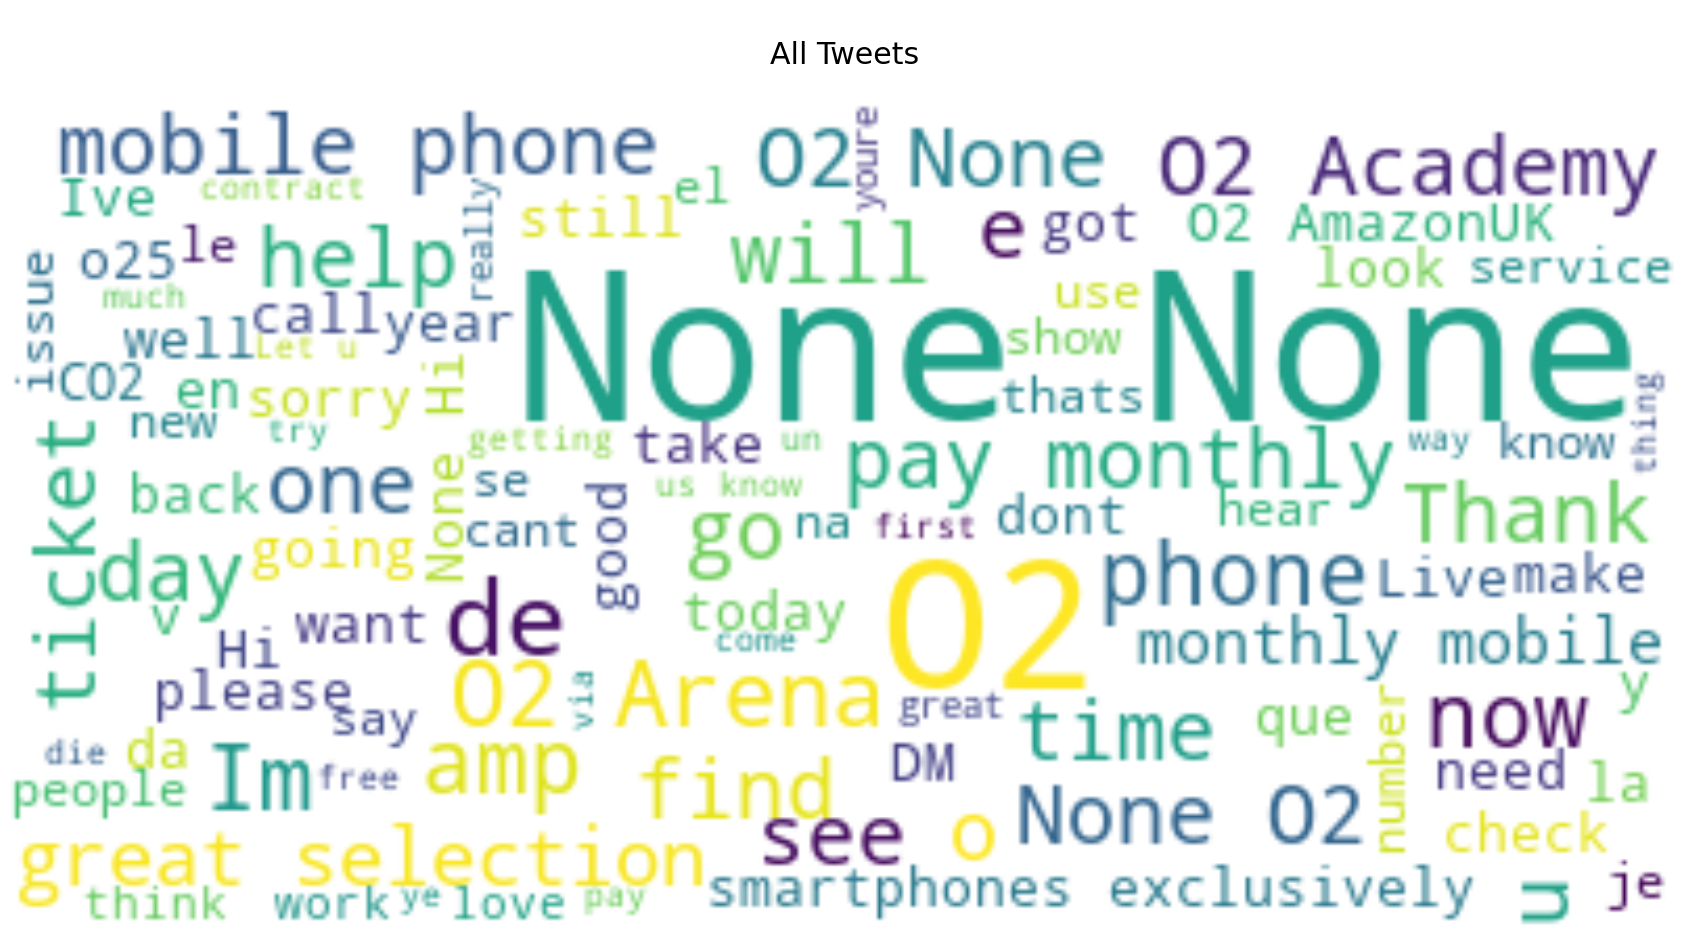

In [63]:
# Visualization through wordclouds
tweet_All = " ".join(review for review in df_bt.content)

fig, ax = plt.subplots(1, 1, figsize  = (30,30))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)

# Display the generated image:
ax.imshow(wordcloud_ALL, interpolation='bilinear')
ax.set_title('\nAll Tweets\n', fontsize=30)
ax.axis('off')

In [64]:
o2= df_o2[df_o2['content']=='bt']

In [65]:
o2['content'].count()

21

In [66]:
bt=df_bt[df_bt['content']=='o2']

In [67]:
bt['content'].count()

29